# Simple Data Output Prediction Project
## University Coursework

This Jupyter notebook details a data output prediction project for a university coursework. The project involves:

- **Data Cleaning**: Importing and preparing data, addressing missing values, and separating numerical from non-numerical data.
- **Outlier Detection**: Using box plots and Z-scores to identify and manage outliers in the dataset.
- **Data Visualization**: Employing visualizations like scatter and box plots to explore data relationships and distributions.
- **Model Training**: Applying and tuning Support Vector Machines (SVMs) to predict outcomes based on processed data.
- **Model Evaluation**: Testing model accuracy on separate training, validation, and test datasets.

### Objective
The main objective is to demonstrate the application of data cleaning, visualization, and machine learning techniques to predict outcomes efficiently and accurately.

### Tools and Libraries Used
- `Pandas` and `NumPy` for data handling.
- `Matplotlib` and `Seaborn` for plotting.
- `Scikit-learn` for building and evaluating prediction models.

This notebook is structured sequentially, ensuring a clear and educational demonstration of each step in the data analysis and machine learning process.


# Data Cleaning

In [2]:
#importing required libraries for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [3]:
#importing CSV dataset

dataset_df = pd.read_csv("Coursework_dataset.csv")

#handling missing values in the data set
# since the column contains both numerical and non-numerical values, we need to do more steps to process and clean the data

#separating numerical and non numerical values

num_values_v1 = pd.to_numeric(dataset_df['Variable 1'], errors='coerce')
non_num_values_v1 = dataset_df['Variable 1'][pd.to_numeric(dataset_df['Variable 1'], errors='coerce').isna()]
num_values_v2 = pd.to_numeric(dataset_df['Variable 2'], errors='coerce')
non_num_values_v2 = dataset_df['Variable 2'][pd.to_numeric(dataset_df['Variable 2'], errors='coerce').isna()]

# Filling NaN in the numeric part with the median
num_values_v1.fillna(num_values_v1.median(), inplace=True)
num_values_v2.fillna(num_values_v2.median(), inplace=True)

# Concatenating the two parts back together
dataset_df['Variable 1'] = pd.concat([num_values_v1, non_num_values_v1]).reset_index(drop=True)
dataset_df['Variable 2'] = pd.concat([num_values_v2, non_num_values_v2]).reset_index(drop=True)

# Converting the column to the numeric data
dataset_df['Variable 1'] = pd.to_numeric(dataset_df['Variable 1'], errors='coerce')
dataset_df['Variable 2'] = pd.to_numeric(dataset_df['Variable 2'], errors='coerce')

# finding most repeated label in the label column and assigning for empty label cells

if (dataset_df['Label'].value_counts().get('Blue', 0) > dataset_df['Label'].value_counts().get('Red', 0)) :
    default_value = 'Blue'
else:
    default_value = 'Red'
    
dataset_df['Label'].fillna(default_value, inplace=True)

# setting numerical equivalent for labels, here we consider Blue as 0 and Red as 1

label_mapping = {'Blue': 0 , 'Red': 1 }

dataset_df['Label'] = dataset_df['Label'].map(label_mapping)


In [4]:
#Dropping index column in the dataframe as it is not required

dataset_df = dataset_df.drop(columns=['Index'])

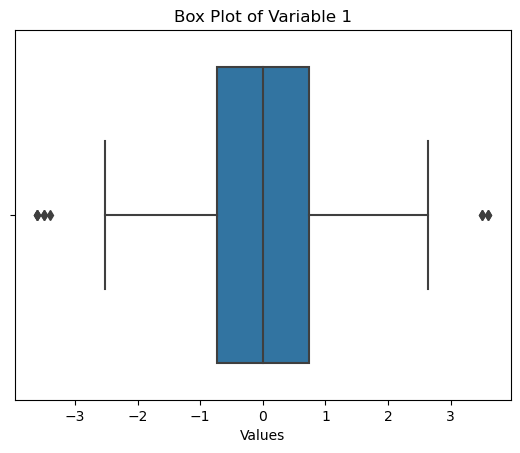

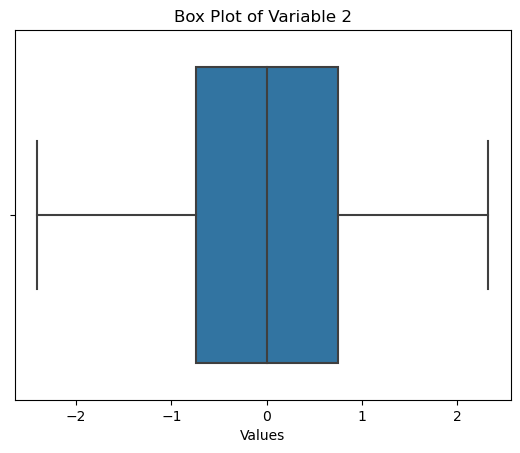

In [5]:
# Taking care of outliers for the dataset

# for Variable 1 column , plotting boxplot to identify outliers
sns.boxplot(x=dataset_df['Variable 1'])
plt.title('Box Plot of Variable 1')
plt.xlabel("Values")
plt.show()

# for Variable 2 column , plotting boxplot to identify outliers
sns.boxplot(x=dataset_df['Variable 2'])

plt.title('Box Plot of Variable 2')
plt.xlabel("Values")
    
plt.show()

In [6]:
# Calculating Z-scores for 'Variable 1' column for finding outliers
z_scores_v1 = zscore(dataset_df['Variable 1'])
threshold = 3

# Identifying outliers
outliers_v1 = dataset_df[abs(z_scores_v1) > threshold]

print("Outliers Values in the Variable 1")

print(outliers_v1)

Outliers Values in the Variable 1
      Variable 1  Variable 2  Label
255         -3.5         2.0      0
456          3.5        -2.0      1
1143         3.6        -2.0      1
1531        -3.6         2.0      0
2011        -3.5        -2.0      1
2686         3.5         2.0      0
3221        -3.6        -2.0      1
3817         3.6         2.0      0
4633        -3.6        -2.1      1
4711        -3.4         2.1      0


In [7]:
# Calculating Z-scores for 'Variable 2' column for finding outliers
z_scores_v2 = zscore(dataset_df['Variable 2'])

# Identifying outliers
outliers_v2 = dataset_df[abs(z_scores_v2) > threshold]

print("Outliers Values in the Variable 1")

print(outliers_v2)

Outliers Values in the Variable 1
Empty DataFrame
Columns: [Variable 1, Variable 2, Label]
Index: []


In [8]:
#since there are no outliers for variable 2, replacing outliers with the median for variable 1 column alone
replace_value = dataset_df['Variable 1'].median()
dataset_df['Variable 1'] = np.where(abs(z_scores_v1) > threshold, replace_value, dataset_df['Variable 1'])

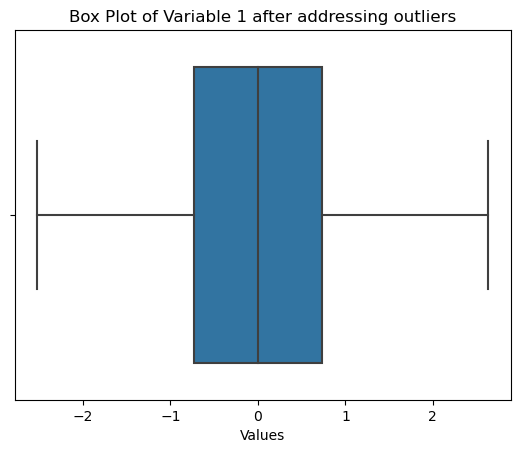

Empty DataFrame
Columns: [Variable 1, Variable 2, Label]
Index: []


In [9]:
#plotting box plot and checking z-scores for variable 1 to verifying existence of outliers

sns.boxplot(x=dataset_df['Variable 1'])
plt.title('Box Plot of Variable 1 after addressing outliers')
plt.xlabel("Values")
plt.show()

# Calculating Z-scores for 'Variable 1' column for finding outliers
z_scores_v1_new = zscore(dataset_df['Variable 1'])

# Identifying outliers
outliers_v1_new = dataset_df[abs(z_scores_v1_new) > threshold]

print(outliers_v1_new)

In [10]:
# Checking for any other data types other than int or float in the columns

non_numeric_columns = dataset_df.select_dtypes(exclude=['int', 'float']).columns

if len(non_numeric_columns) > 0:
    print("Columns with non numeric values: {non_numeric_columns}")
else:
    print("All values of the data frame are of int or float datatype")

All values of the data frame are of int or float datatype


# Data Exploration and Visualisation

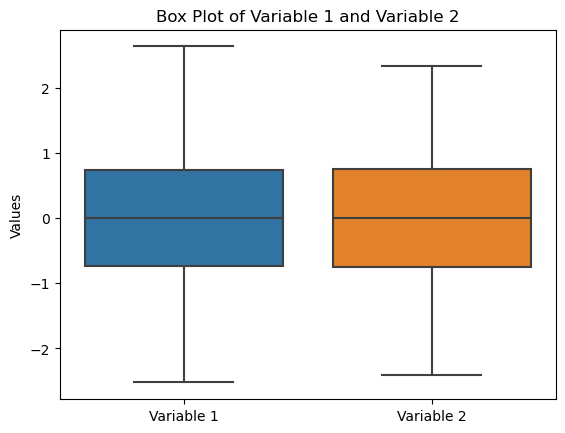

In [11]:
# Plotting a box plot for both the variables in the same graph for visualization and comparison 
sns.boxplot(data=dataset_df[['Variable 1', 'Variable 2']])
plt.title('Box Plot of Variable 1 and Variable 2')
plt.ylabel('Values')
plt.show()

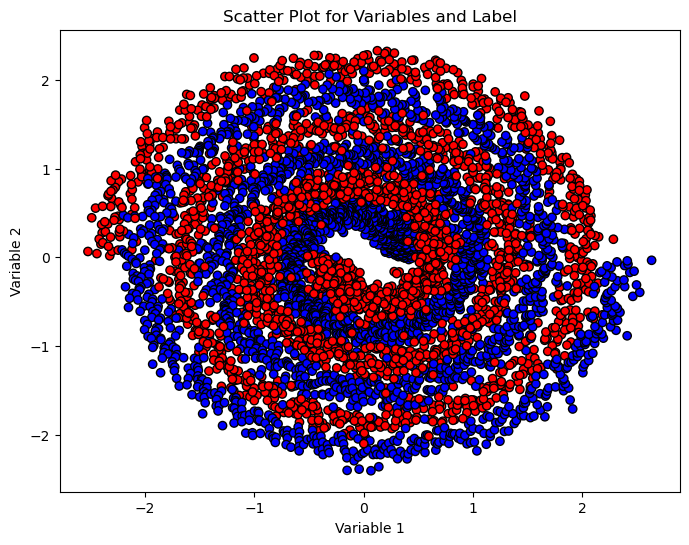

In [12]:
# Plot to visualize the patterns in the data

# mapping colours to label values to render respective colours in the scatter plot
colour_mapping = {0: 'blue', 1: 'red'}
colours = [colour_mapping[label] for label in dataset_df['Label']]

# plotting the scatter plot to visualize the patterns in the data
plt.figure(figsize=(8, 6))
plt.scatter(dataset_df['Variable 1'], dataset_df['Variable 2'], c=colours, edgecolors='k', marker='o')

# Adding labels and title
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter Plot for Variables and Label')

plt.show()

# Model Selection

In [13]:
# Splitting data in to training and testing data using SkLearn train test split. We have chosen 80:20 ration for train and test 
# data
from sklearn.model_selection import train_test_split

X_df = dataset_df.drop(columns=['Label'])
Y_df = dataset_df['Label']

# Splitting the data into training (70%), validation (10%), and test (20%) sets
x_train, x_temp, y_train, y_temp = train_test_split(X_df, Y_df, test_size=0.3, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.33, random_state=42)


print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(3500, 2)
(3500,)
(495, 2)
(495,)
(1005, 2)
(1005,)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


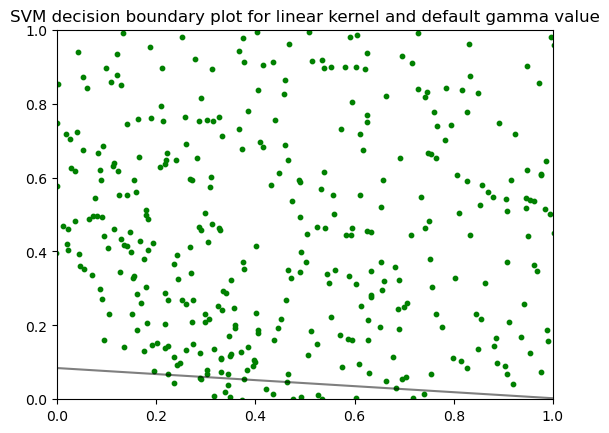

Training Accuracy: 50.00%
Validation Accuracy: 50.91%


In [14]:
# running SVM algorithm on the training set obtained in the previous step
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear', C=1)

svm_model.fit(x_train, y_train)

y_predictions = svm_model.predict(x_train)

def plot_svc_decision_function(model, title, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=10, linewidth=1, facecolors='green');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(f'{title}')

#plotting the decision boundary and data points

plot_svc_decision_function(svm_model, "SVM decision boundary plot for linear kernel and default gamma value")
plt.show()

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, y_predictions)

# Print the training accuracy
print(f'Training Accuracy: {training_accuracy * 100:.2f}%')

#predicting for validation data set

y_pred_val =  svm_model.predict(x_val)

validation_accuracy = accuracy_score(y_val, y_pred_val)

# Print the validation training accuracy
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Gamma = 1, Training Accuracy = 60.0%
Gamma = 1, Validation Accuracy = 55.00000000000001%


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Gamma = 10, Training Accuracy = 92.0%
Gamma = 10, Validation Accuracy = 89.0%


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Gamma = 1000, Training Accuracy = 99.0%
Gamma = 1000, Validation Accuracy = 82.0%


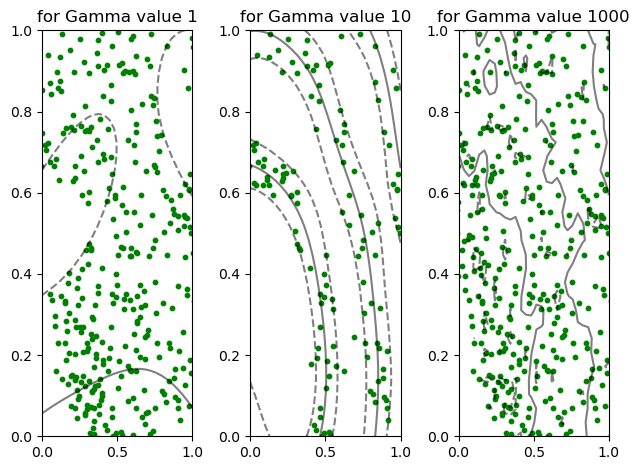

In [15]:
# SVM using RBF Kernel

gamma_values = [1, 10, 1000]

# executing SVM with RBF kernel for different gamma values and fixed C value

for i, gamma in enumerate(gamma_values, 1):
    
    plt.subplot(1, 3, i)
    
    #creating a SVM model for the current gamma value
    
    svm_model_rbf = SVC(kernel='rbf', C=1, gamma=gamma)
    
    #Fitting the model with training data
    svm_model_rbf.fit(x_train, y_train)
    
    #Plotting the decision function for the SVM model
    plot_svc_decision_function(svm_model_rbf, f"for Gamma value {gamma}")
    
    # Predicting the results for training data set
    y_pred_rbf = svm_model_rbf.predict(x_train)
    
    # Calculating accuracy for the training set
    accuracy_train_rbf = accuracy_score(y_train, y_pred_rbf)
    
    print(f"Gamma = {gamma}, Training Accuracy = {np.round(accuracy_train_rbf, 2) * 100}%")
    
    # Making the predictions according to the validation set
    y_pred_rbf = svm_model_rbf.predict(x_val)

    # Calculating the accuracy score for the validation set predictions
    accuracy_val_rbf = accuracy_score(y_val, y_pred_rbf)
    
    print(f"Gamma = {gamma}, Validation Accuracy = {np.round(accuracy_val_rbf, 2) * 100}%")

plt.tight_layout()
plt.show()   

In [16]:
# Code for finding better model using Cross Validation and GridSearchCV
# Importing GridSearchCV library to execute GridSearchCV
from sklearn.model_selection import GridSearchCV

# Defining set of hyperparameters for the SVM model
param_set = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10]}

# Creating a SVM model with the RBF (Radial Basis Function) kernel
svm_model_untuned = SVC(kernel='rbf')

# Setting up a GridSearchCV object with the untuned SVM model, hyperparameter set, 
# 5-fold cross-validation, and accuracy as the scoring metric
grid_search = GridSearchCV(svm_model_untuned, param_set, cv=5, scoring='accuracy')

# Fitting the GridSearchCV object on the training data
grid_search.fit(x_train, y_train)

# Retrieving the best hyperparameters
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")

# Retrieving the best model from the Grid Search
svm_model_tuned = grid_search.best_estimator_

# Making predictions according to the training set

y_pred_train_tuned = svm_model_tuned.predict(x_train)

# Calculating the accuracy score for the training data set predictions
accuracy_train_tuned = accuracy_score(y_train, y_pred_train_tuned)

print(f"Accuracy on Training Set: {np.round(accuracy_train_tuned, 2)*100}%")

# Making the predictions according to the validation set
y_pred_tuned = svm_model_tuned.predict(x_val)

# Calculating the accuracy score for the validation set predictions
accuracy_val_tuned = accuracy_score(y_val, y_pred_tuned)

print(f"Accuracy on Validation Set: {np.round(accuracy_val_tuned, 2) *100}%")

Best Parameters: {'C': 1, 'gamma': 10}
Accuracy on Training Set: 92.0%
Accuracy on Validation Set: 89.0%


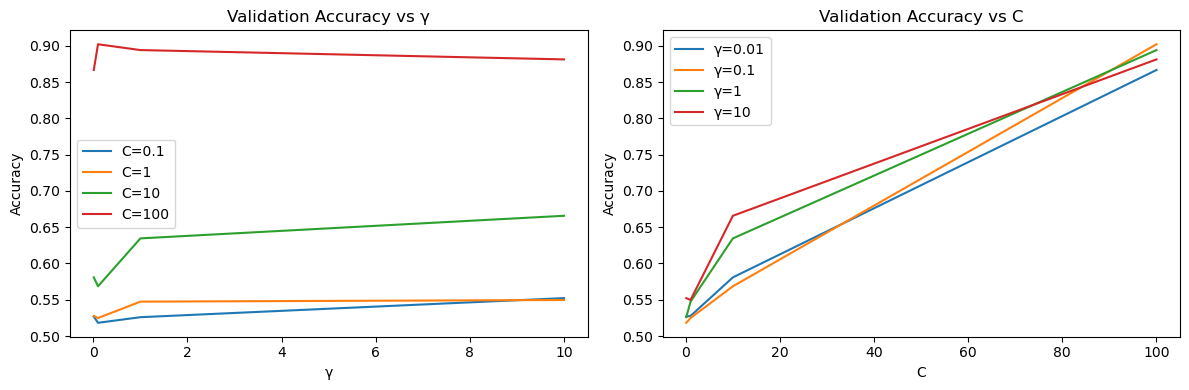

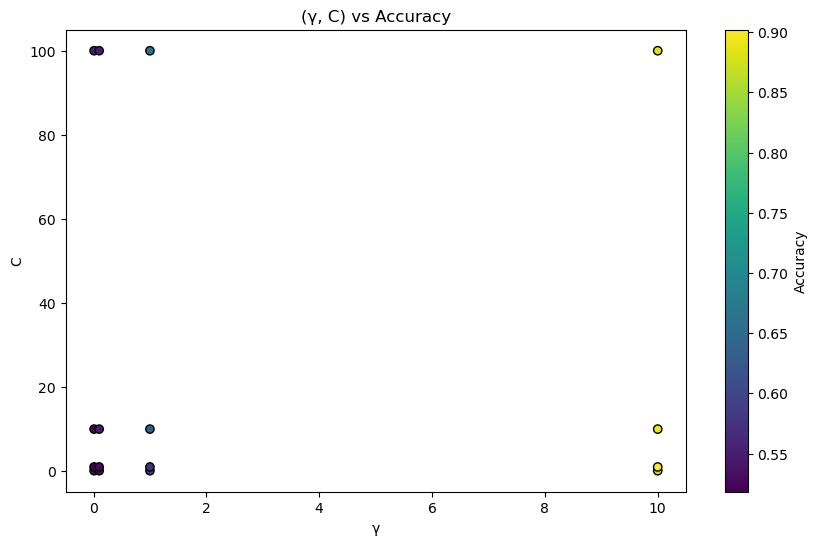

In [17]:
# Retrieving gamma, C, and accuracy values from GridSearchCV results

gamma_values = [params['gamma'] for params in grid_search.cv_results_['params']]
C_values = [params['C'] for params in grid_search.cv_results_['params']]
accuracy_scores = grid_search.cv_results_['mean_test_score']

# Reshaping the accuracy scores for plotting
accuracy_scores_reshaped = np.array(accuracy_scores).reshape(len(param_set['gamma']), len(param_set['C']))

# Plotting Validation Accuracy vs γ and Validation Accuracy vs C in subplots
plt.figure(figsize=(12, 4))

# Subplot 1: Validation Accuracy vs γ
plt.subplot(1, 2, 1)
for i, C_val in enumerate(param_set['C']):
    plt.plot(param_set['gamma'], accuracy_scores_reshaped[:, i], label=f'C={C_val}')

plt.title('Validation Accuracy vs γ')
plt.xlabel('γ')
plt.ylabel('Accuracy')
plt.legend()

# Subplot 2: Validation Accuracy vs C
plt.subplot(1, 2, 2)
for i, gamma_val in enumerate(param_set['gamma']):
    plt.plot(param_set['C'], accuracy_scores_reshaped[i, :], label=f'γ={gamma_val}')

plt.title('Validation Accuracy vs C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()

# Adjusting layout and display subplots
plt.tight_layout()
plt.show()

# Plot (γ, C) vs Accuracy in a 2D graph
plt.figure(figsize=(10, 6))

# Scatter plot for (γ, C) vs Accuracy
plt.scatter(gamma_values, C_values, c=accuracy_scores, cmap='viridis', marker='o', edgecolors='k')
plt.colorbar(label='Accuracy')
plt.xlabel('γ')
plt.ylabel('C')
plt.title('(γ, C) vs Accuracy')

plt.show()

In [18]:
# Testing the model
# Importing classification_report library to calculate Precision, Recall and F1-Score of the model
from sklearn.metrics import classification_report

# Predicting the results for the test data set
y_pred_test = svm_model_tuned.predict(x_test)

# Calculating the accuracy for test data set
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy on Test Set: {np.round(accuracy_test, 2) * 100}%")

# Printing the classification report for Validation Set
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_pred_tuned))

#Printing the classification report for Test Set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

Accuracy on Test Set: 90.0%
Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       248
           1       0.89      0.89      0.89       247

    accuracy                           0.89       495
   macro avg       0.89      0.89      0.89       495
weighted avg       0.89      0.89      0.89       495

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       485
           1       0.91      0.89      0.90       520

    accuracy                           0.90      1005
   macro avg       0.90      0.90      0.90      1005
weighted avg       0.90      0.90      0.90      1005

